## Introduction to Python 

### In this note book we will: 
* Import libraries
* Load data into a data frame
* Write a line of code to change the name of a file in a folder 
* Write a loop to rename all the files within a folder 

The goal is to become familiar with some syntax and how to build a simple line of code into a 'production line' for the repetitive tasks you do.

## Part one: Importing or installing Python Libraries 

 Your Python IDE comes with lots of libraries already installed that just need to be imported into your script. To do this you need to type ' import library as alias ‘ or, if you know you only need one module you can ' import module from library as alias ' The syntax is straightforward. You may need to google which library you need and check the documentation on how to use it.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [1]:
import folium
from folium import Choropleth
from folium.plugins import HeatMap

ModuleNotFoundError: No module named 'folium'

Installing a library takes a little more effort. First off - we are working in the base environment right now. This is the OG standard installation of your Python. When you start installing additional libraries, they can conflict with existing ones or they may require a specific version of Python. To avoid 'breaking the base' or other issues it is good practice to create a new environment "env" for your script. This also makes it easier to share your code as other programmers can get your script and the env that it runs in without needing to download all the bloatwear in your base env. Before we install folium - folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library to create beautiful maps, let's create an env for our project.


To do this, go to your main anaconda page. Navigate to the Environments tab on the left of the home page. When you click here you will see all the env's you have created in a list on the left and a view of all the libraries that each env has imported currently on the right. At the bottom of the page, you can click on ' Create'. A window will pop up where you can name your env, choose the language: R or Python, and choose the version. We will call ours test_env and leave the rest as is. 

The last thing to do is to switch to this env - Just click on it and wait. Any library you imported or installed in the notebook before this point with need to be reimported or installed.

Installing a libarary now is easy - just type conda install libabrary as we are in the Anaconda IDE, other syntax includes pip install but you won't need this for our purposes today.


##### You can also import some libraries from the Environment tab by searching for them and clicking a button - this list is not everything available but check here first to make your life easier. 

## Part Two: Let's make a data frame!

##### now that we have the libraries we need - lets load a .csv file and have a look at the data.

In [7]:
df = pd.read_csv(r'C:\Users\padams\OneDrive - CGG\intro to py\data\database.csv')

In [8]:
df.head(3)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic


##### let's have a quick look at this earthquake data we just loaded into our notebook. There is a lot of data and a lot we could learn from this using Python, but for today we will just do a basic data cleaning and plot a few things just to show the power of Python.

In [13]:
#Parsing datetime
#exploring the length of date objects
lengths = df["Date"].str.len()
lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [16]:
#having a look at the fishy datapoints
wrongdates = np.where([lengths == 24])[1]
print("Fishy dates:", wrongdates)
df.loc[wrongdates]

Fishy dates: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [17]:
#fixing the wrong dates and changing the datatype from numpy object to datetime64[ns]
df.loc[3378, "Date"] = "02/23/1975"  
df.loc[7512, "Date"] = "04/28/1985"
df.loc[20650, "Date"] = "03/13/2011"
df['Date']= pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  datetime64[ns]
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 4461 non-null   float64       
 7   Depth Seismic Stations      7097 non-null   float64       
 8   Magnitude                   23412 non-null  float64       
 9   Magnitude Type              23409 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64   

In [ ]:
#We have time data too. Now that we are at it,lets parse it as well. 
#exploring the length of time objects
lengths = df["Time"].str.len()
lengths.value_counts()

In [18]:
#Having a look at the fishy datapoints
wrongtime = np.where([lengths == 24])[1]
print("Fishy time:", wrongtime)
df.loc[wrongtime]

Fishy time: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [19]:
#Ah! Is it deja vu or are those the same datapoints
#fixing the wrong time and changing the datatype from numpy object to timedelta64[ns]
df.loc[3378, "Time"] = "02:58:41"
df.loc[7512, "Time"] = "02:53:41"
df.loc[20650, "Time"] = "02:23:34"
df['Time']= pd.to_timedelta(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Date                        23412 non-null  datetime64[ns] 
 1   Time                        23412 non-null  timedelta64[ns]
 2   Latitude                    23412 non-null  float64        
 3   Longitude                   23412 non-null  float64        
 4   Type                        23412 non-null  object         
 5   Depth                       23412 non-null  float64        
 6   Depth Error                 4461 non-null   float64        
 7   Depth Seismic Stations      7097 non-null   float64        
 8   Magnitude                   23412 non-null  float64        
 9   Magnitude Type              23409 non-null  object         
 10  Magnitude Error             327 non-null    float64        
 11  Magnitude Seismic Stations  2564 non-null

In [20]:
#Now that we have Date, Time (and Date_Time) we totally should have Days of week too. I mean that's only fair. 
df["Days"]= df.Date.dt.strftime("%A")

In [21]:
df.head(3)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Days
0,1965-01-02,0 days 13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Saturday
1,1965-01-04,0 days 11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Monday
2,1965-01-05,0 days 18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Tuesday


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Date                        23412 non-null  datetime64[ns] 
 1   Time                        23412 non-null  timedelta64[ns]
 2   Latitude                    23412 non-null  float64        
 3   Longitude                   23412 non-null  float64        
 4   Type                        23412 non-null  object         
 5   Depth                       23412 non-null  float64        
 6   Depth Error                 4461 non-null   float64        
 7   Depth Seismic Stations      7097 non-null   float64        
 8   Magnitude                   23412 non-null  float64        
 9   Magnitude Type              23409 non-null  object         
 10  Magnitude Error             327 non-null    float64        
 11  Magnitude Seismic Stations  2564 non-null

##### Now that we have dates and times we can rely on - lets make a quick plot of earthquakes over the years by magnitude  

Text(0.5, 0, 'Date')

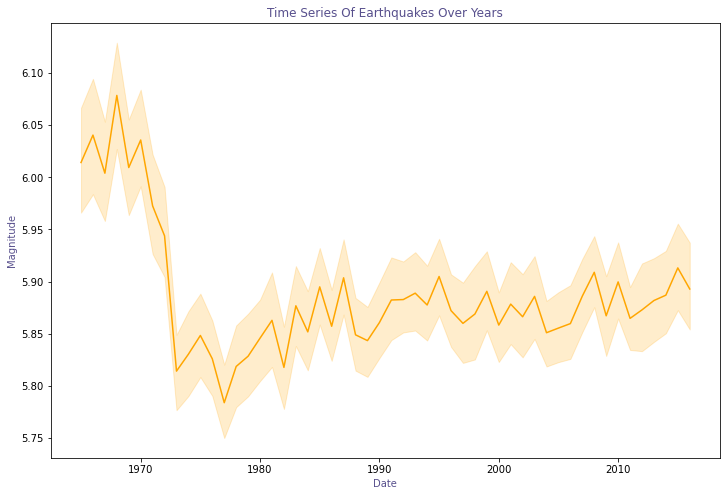

In [33]:
#plotting a lineplot with magnitudes with respectto dates
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=df['Date'].dt.year,y=df["Magnitude"],data=df, color="#ffa600")
Time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
Time_series.set_ylabel("Magnitude", color="#58508d")
Time_series.set_xlabel("Date", color="#58508d")

#### There's loads we can do with this type of data - but lets get back to th point

## Part Three: Renaming Files

###### What we want to do now is take a file and rename it. In code we can do it like this:

In [ ]:
import os

os.rename('old_file.csv', 'new_file.csv')

In [ ]:
import random
import string 

In [ ]:
Folder_path = r'folder_path'

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        random_name = ''.join(random.choices(string.ascii_letters + string.digits, k=6))
        os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, random_name))